**Analysis On Mobile And User Dataset**


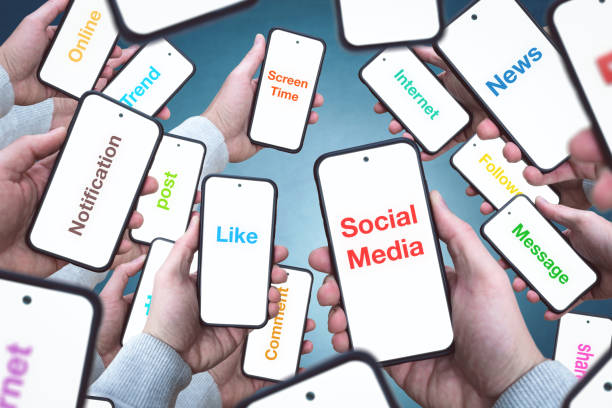

***About Dataset***

This dataset provides a comprehensive analysis of mobile device usage patterns and user behavior classification. It contains 700 samples of user data, including metrics such as app usage time, screen-on time, battery drain, and data consumption. Each entry is categorized into one of five user behavior classes, ranging from light to extreme usage, allowing for insightful analysis and modeling.

***Key Features:***

User ID: Unique identifier for each user.

Device Model: Model of the user's smartphone.

Operating System: The OS of the device (iOS or Android).

App Usage Time: Daily time spent on mobile applications, measured in minutes.

Screen On Time: Average hours per day the screen is active.

Battery Drain: Daily battery consumption in mAh.

Number of Apps Installed: Total apps available on the device.

Data Usage: Daily mobile data consumption in megabytes.
Age: Age of the user.

Gender: Gender of the user (Male or Female).

User Behavior Class: Classification of user behavior based on usage patterns (1 to 5).


This dataset is ideal for researchers, data scientists, and analysts interested in understanding mobile user behavior and developing predictive models in the realm of mobile technology and applications. This Dataset was primarily designed to implement machine learning algorithms and is not a reliable source for a paper or article.

***In This Steps I Import Some Of Libraries I Need In My Project***

In [ ]:
# Data manipulation and analysis
import numpy as np
import pandas as pd

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Scikit-learn for machine learning
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import skew
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, mean_squared_error


**In this step** we load the data that we will work on it his name is **"user_behavior_dataset.csv"**

In [ ]:
data=pd.read_csv('user_behavior_dataset.csv')
data.head(3)

,User ID,Device Model,Operating System,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Gender,User Behavior Class
0,1,Google Pixel 5,Android,393,6.4,1872,67,1122,40,Male,4
1,2,OnePlus 9,Android,268,4.7,1331,42,944,47,Female,3
2,3,Xiaomi Mi 11,Android,154,4.0,761,32,322,42,Male,2


**Check Information of the data**


In [ ]:
from IPython.display import display, HTML
html_content = """
<h1 style="color: red;">Start Data processing</h1>"""
display(HTML(html_content))


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   User ID                     700 non-null    int64  
 1   Device Model                700 non-null    object 
 2   Operating System            700 non-null    object 
 3   App Usage Time (min/day)    700 non-null    int64  
 4   Screen On Time (hours/day)  700 non-null    float64
 5   Battery Drain (mAh/day)     700 non-null    int64  
 6   Number of Apps Installed    700 non-null    int64  
 7   Data Usage (MB/day)         700 non-null    int64  
 8   Age                         700 non-null    int64  
 9   Gender                      700 non-null    object 
 10  User Behavior Class         700 non-null    int64  
dtypes: float64(1), int64(7), object(3)
memory usage: 60.3+ KB


**Check Describtion of the data**

In [ ]:
data.describe()

,User ID,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,User Behavior Class
count,700.00000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000
mean,350.50000,271.128571,5.272714,1525.158571,50.681429,929.742857,38.482857,2.990000
std,202.21688,177.199484,3.068584,819.136414,26.943324,640.451729,12.012916,1.401476
min,1.00000,30.000000,1.000000,302.000000,10.000000,102.000000,18.000000,1.000000
25%,175.75000,113.250000,2.500000,722.250000,26.000000,373.000000,28.000000,2.000000
50%,350.50000,227.500000,4.900000,1502.500000,49.000000,823.500000,38.000000,3.000000
75%,525.25000,434.250000,7.400000,2229.500000,74.000000,1341.000000,49.000000,4.000000
max,700.00000,598.000000,12.000000,2993.000000,99.000000,2497.000000,59.000000,5.000000


**In this step i check if there any null value**

In [ ]:
data.isna().sum()

,0
User ID,0
Device Model,0
Operating System,0
App Usage Time (min/day),0
Screen On Time (hours/day),0
Battery Drain (mAh/day),0
Number of Apps Installed,0
Data Usage (MB/day),0
Age,0
Gender,0


**In this step i check if there any duplicated value**

In [ ]:
data.duplicated().sum()

0

Print All Column Which His DataType Is Object

In [ ]:
for n in data:
   if data[n].dtype=='object':
      print(data[n].name)

Device Model
Operating System
Gender


**In This Stype I  Convert Datatype From Object TO Category Because **

*   The category data type is more memory-efficient than object
*   Operations on category columns are often faster than on object







In [ ]:
data['Device Model'] = data['Device Model'].astype('category')
data['Operating System'] = data['Operating System'].astype('category')
data['Gender'] = data['Gender'].astype('category')

**This Step is very import to check if my data have Outliers OR don't have Because Outliers can distort statistical measures (like the mean and standard deviation), skew data distributions, and reduce model performance by causing biased or less generalizable predictions. Detecting and addressing them helps ensure more accurate and reliable analysis and modeling.**








In [ ]:


df = pd.DataFrame(data)

# Detecting Outliers with IQR Method
def check_outliers_iqr(df):
    found_outliers = False
    for column in df.select_dtypes(include=[np.number]):
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
        if not outliers.empty:
            print(f"Outliers found in '{column}'")
            found_outliers = True
    if not found_outliers:
        print("No outliers found")

check_outliers_iqr(df)


No outliers found


**Check Skew data**

In [ ]:
df = pd.DataFrame(data)

# Calculate skewness for each numeric column
data_skew_check = df.select_dtypes(include=[np.number]).apply(lambda x: skew(x))

# Display skewness for each column
for column, skewness in data_skew_check.items():
    if skewness > 0.5:
        print(f"{column} is right-skewed with skewness: {skewness:.2f}")
    elif skewness < -0.5:
        print(f"{column} is left-skewed with skewness: {skewness:.2f}")
    else:
        print(f"{column} is approximately normal with skewness: {skewness:.2f}")

User ID is approximately normal with skewness: 0.00
App Usage Time (min/day) is approximately normal with skewness: 0.37
Screen On Time (hours/day) is approximately normal with skewness: 0.46
Battery Drain (mAh/day) is approximately normal with skewness: 0.13
Number of Apps Installed is approximately normal with skewness: 0.11
Data Usage (MB/day) is right-skewed with skewness: 0.70
Age is approximately normal with skewness: 0.03
User Behavior Class is approximately normal with skewness: 0.02


In [ ]:
data_skew_check = df.select_dtypes(include=[np.number]).apply(skew)
data_skew_check


,0
User ID,0.000000
App Usage Time (min/day),0.371514
Screen On Time (hours/day),0.459006
Battery Drain (mAh/day),0.134270
Number of Apps Installed,0.111494
Data Usage (MB/day),0.697765
Age,0.027914
User Behavior Class,0.017781


In [ ]:
from IPython.display import display, HTML
html_content = """
<h1 style="color: red;">Start Data Visulization</h1>"""
display(HTML(html_content))


**Check Skew Of Nummeric columns**

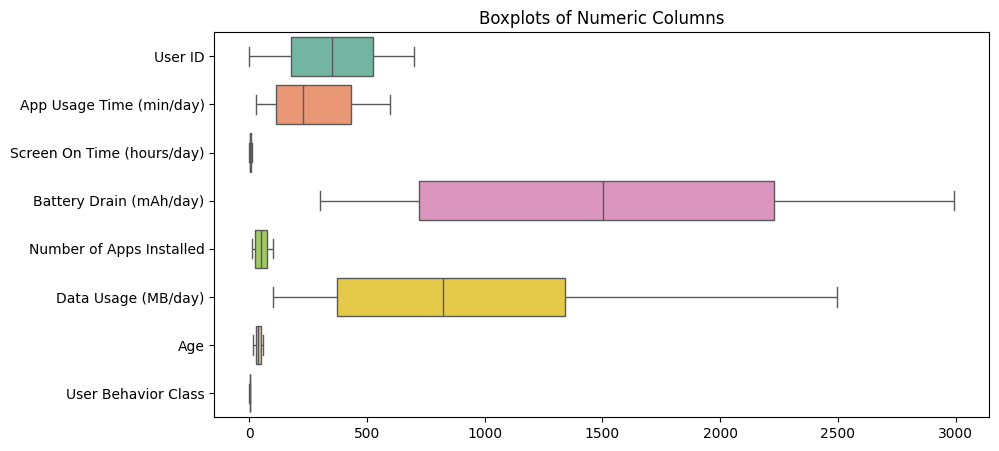

In [ ]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, orient='h', palette='Set2')
plt.title('Boxplots of Numeric Columns')
plt.show()

**This chart is important for present Distribution of App Usage Time**

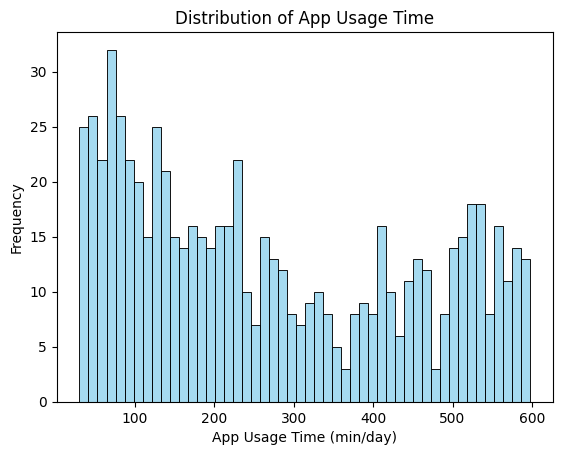

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.histplot(data['App Usage Time (min/day)'], bins=50, color='skyblue')
plt.xlabel('App Usage Time (min/day)')
plt.ylabel('Frequency')
plt.title('Distribution of App Usage Time')
plt.show()


**Histogram for App Usage Time, Screen On Time, Battery Drain, and Data Usage:
Helps to understand the distribution of continuous usage-based metrics.
Example: How frequently users fall within certain ranges for daily app usage time.**

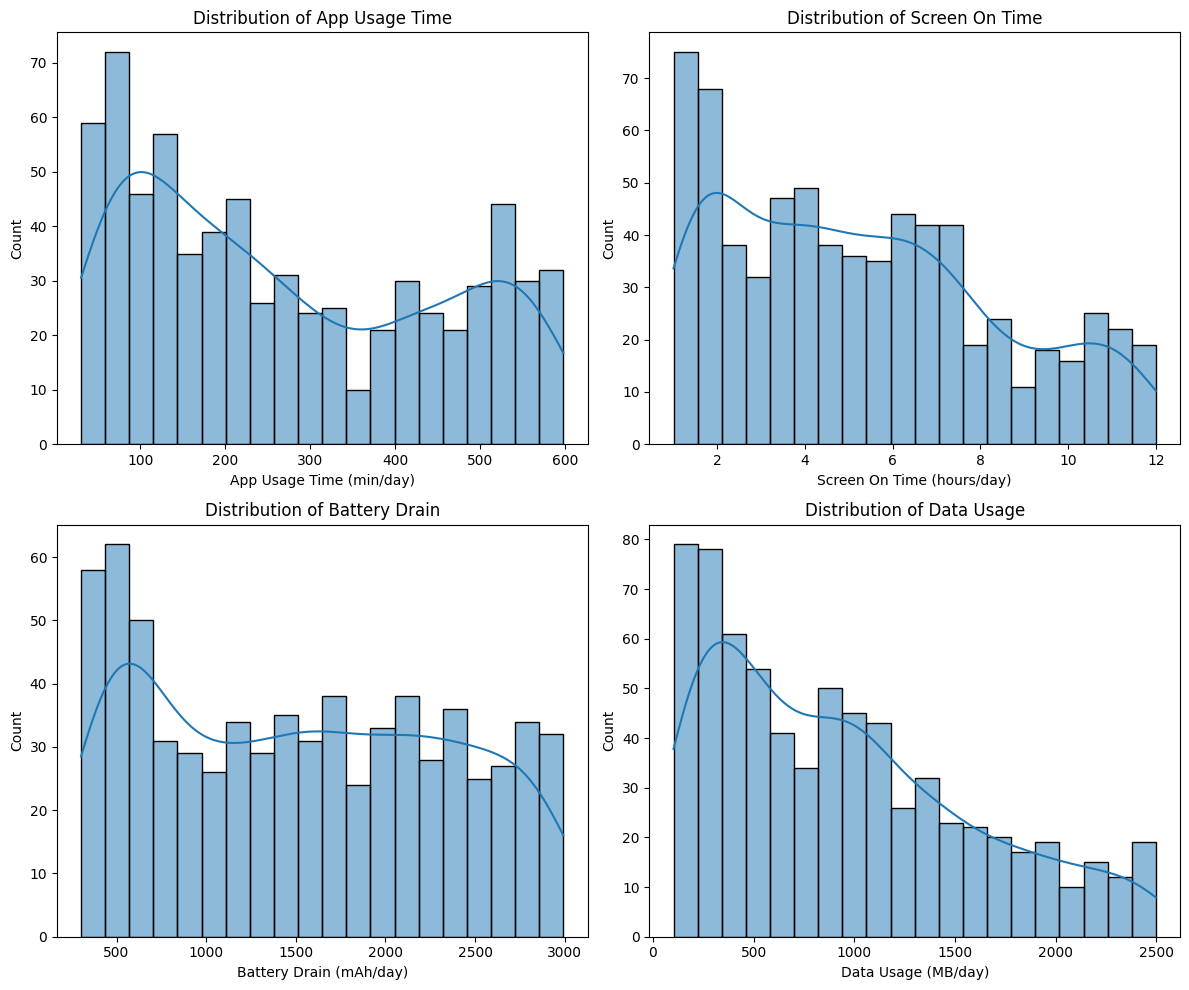

In [ ]:
# Histogram example
fig, axs = plt.subplots(2, 2, figsize=(12, 10))
sns.histplot(df['App Usage Time (min/day)'], bins=20, kde=True, ax=axs[0, 0])
axs[0, 0].set_title('Distribution of App Usage Time')
sns.histplot(df['Screen On Time (hours/day)'], bins=20, kde=True, ax=axs[0, 1])
axs[0, 1].set_title('Distribution of Screen On Time')
sns.histplot(df['Battery Drain (mAh/day)'], bins=20, kde=True, ax=axs[1, 0])
axs[1, 0].set_title('Distribution of Battery Drain')
sns.histplot(df['Data Usage (MB/day)'], bins=20, kde=True, ax=axs[1, 1])
axs[1, 1].set_title('Distribution of Data Usage')
plt.tight_layout()
plt.show()

**Bar Plot for Gender vs. Average App Usage Time:
Useful for comparing metrics across genders.**

<ipython-input-17-a1ddccbf69d4>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='Gender', y='App Usage Time (min/day)', estimator='count', ci=None)


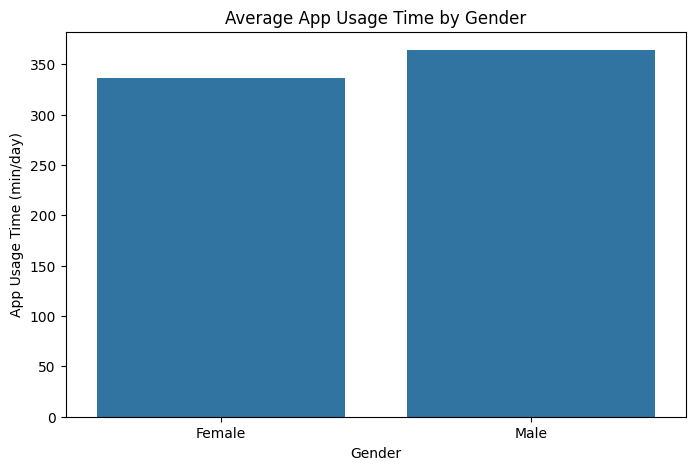

In [ ]:
# Bar Plot Example
plt.figure(figsize=(8, 5))
sns.barplot(data=df, x='Gender', y='App Usage Time (min/day)', estimator='count', ci=None)
plt.title('Average App Usage Time by Gender')
plt.show()


**Scatter Plot of Screen On Time vs. Data Usage:
Helps to see if longer screen time leads to higher data usage.**

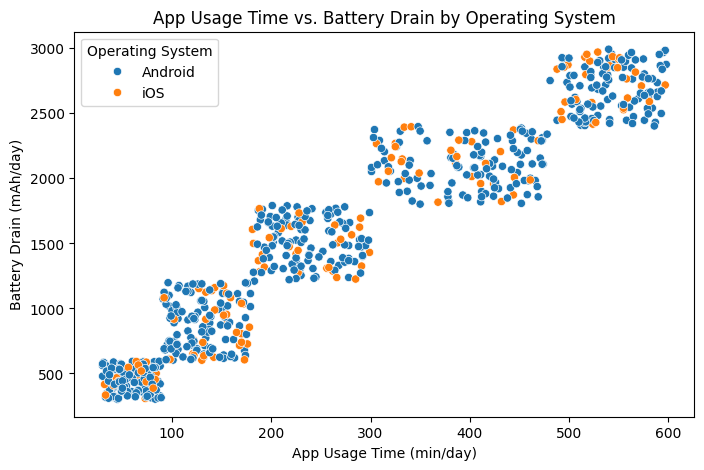

In [ ]:
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='App Usage Time (min/day)', y='Battery Drain (mAh/day)', hue='Operating System')
plt.title('App Usage Time vs. Battery Drain by Operating System')
plt.show()

**bar Plot for User Behavior Class and App Usage Time:
Highlights the distribution of app usage times within different user behavior classes.**

<ipython-input-19-f34ac94acd23>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='User Behavior Class', y='App Usage Time (min/day)', palette='Set2')


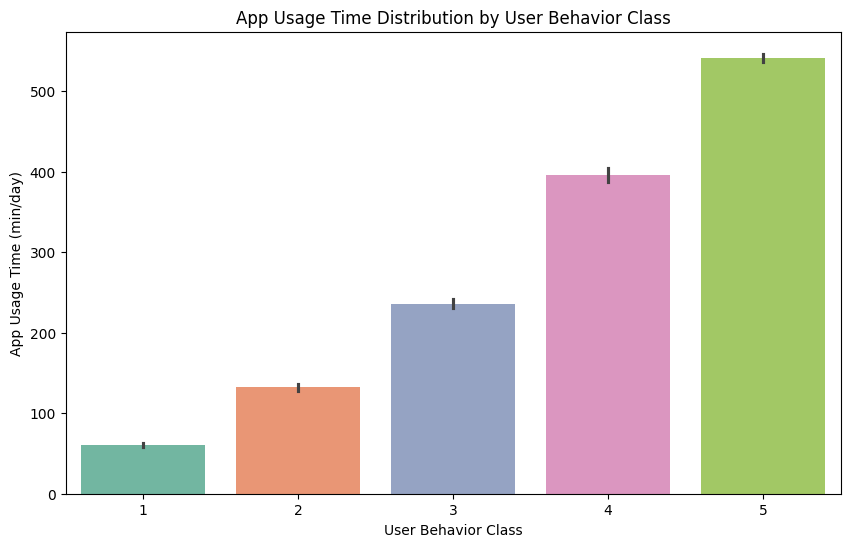

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='User Behavior Class', y='App Usage Time (min/day)', palette='Set2')
plt.title('App Usage Time Distribution by User Behavior Class')
plt.show()

**bar Plot for User Behavior Class and gender:
Highlights the distribution of gender within different user behavior classes.**

<ipython-input-20-d91d3d867a10>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='User Behavior Class', y='Gender', palette='pastel')


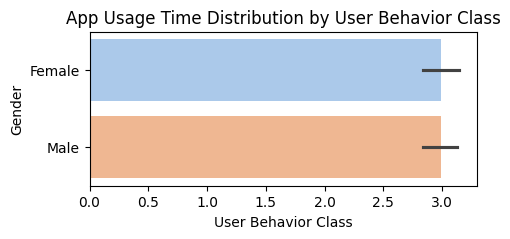

In [ ]:
plt.figure(figsize=(5,2))
sns.barplot(data=df, x='User Behavior Class', y='Gender', palette='pastel')
plt.title('App Usage Time Distribution by User Behavior Class')
plt.show()

**Pie Chart for Operating System Distribution
Pie Chart  of Operating System Distribution:
Quickly shows the breakdown of users by OS.**

*   autopct='%1.1f%%': Adds percentage labels on each slice, showing values with one decimal place.

*   startangle=140: Rotates the pie chart, starting the first slice at 140 degrees for better alignment.



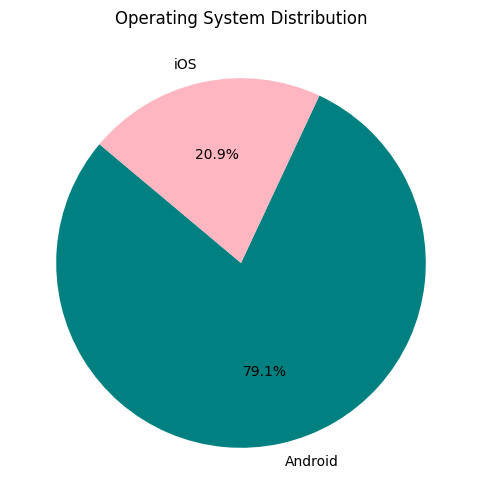

In [ ]:
os_counts = df['Operating System'].value_counts()
plt.figure(figsize=(6, 6))
os_counts.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=['#008080', '#FFB6C0'])
plt.ylabel('')
plt.title('Operating System Distribution')
plt.show()


**Pie Chart  of Device Model Distribution:
Quickly shows the breakdown of users by Device Model.**

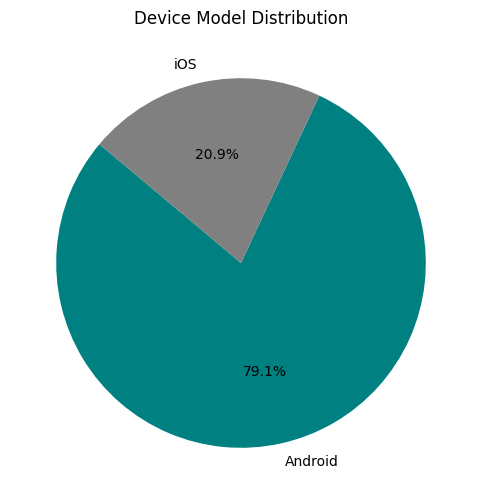

In [ ]:
dm_counts = df['Device Model'].value_counts()
plt.figure(figsize=(6, 6))
os_counts.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=['#008080','#808080','#C0C0C0','#FF00FF', '#FFB6C0'])
plt.ylabel('')
plt.title('Device Model Distribution')
plt.show()

**Dount Chart that shows the distribution of Female and Male values.**

*   The line `centre_circle = plt.Circle((0, 0), 0.50, fc='white')` creates a white circle centered at the origin (0,0) with a radius (***size the middel circle ***) of 0.50, while `plt.gca().add_artist(centre_circle)` adds this circle as an artist to the current axes, effectively creating a hole in the middle of the pie chart to form a donut chart.



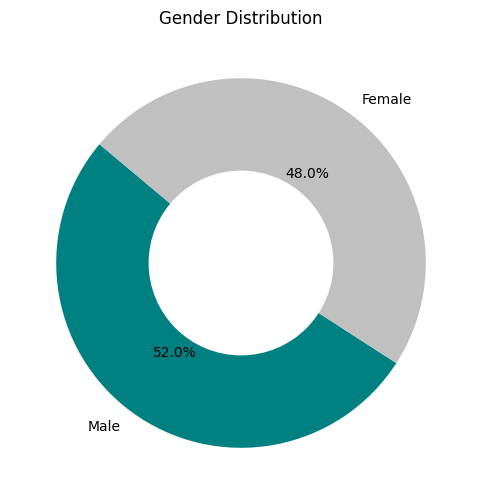

In [ ]:
gender_counts = df['Gender'].value_counts()
plt.figure(figsize=(6, 6))
gender_counts.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=['#008080','#C0C0C0'])
plt.ylabel('')
# Adding a circle at the center for the donut effect
centre_circle = plt.Circle((0, 0), 0.50, fc='white')
plt.gca().add_artist(centre_circle)

plt.title("Gender Distribution")
plt.show()

**Battery Drain Distribution**

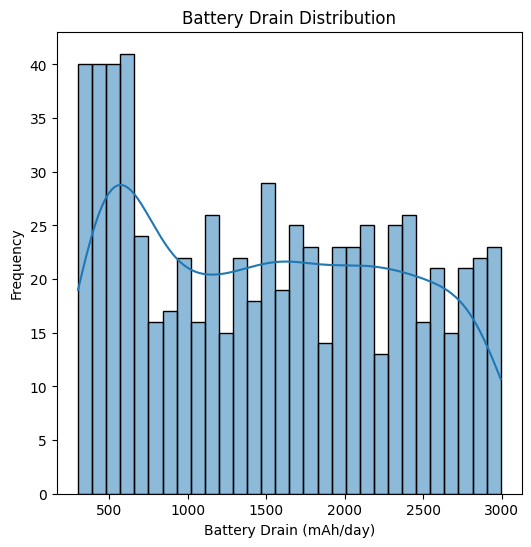

In [ ]:

plt.figure(figsize=(6, 6))
sns.histplot(data['Battery Drain (mAh/day)'], bins=30, kde=True)  # Add bins and kde for density curve
plt.title('Battery Drain Distribution')
plt.xlabel('Battery Drain (mAh/day)')  # Optional: Label for the x-axis
plt.ylabel('Frequency')                  # Optional: Label for the y-axis
plt.show()

**Data Usage Distribution by day**

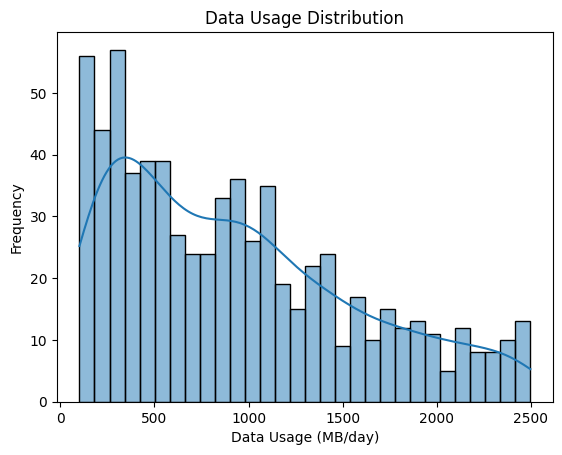

In [ ]:
sns.histplot(data['Data Usage (MB/day)'],bins=30 ,kde=True)  # Add bins and kde for density curve
plt.title('Data Usage Distribution')
plt.xlabel('Data Usage (MB/day)')  # Optional: Label for the x-axis
plt.ylabel('Frequency')                  # Optional: Label for the y-axis
plt.show()


**visualizing the distribution of age frequencies A histogram is  effective for age distribution, especially if i have continuous data or  i want to group ages into bins.**

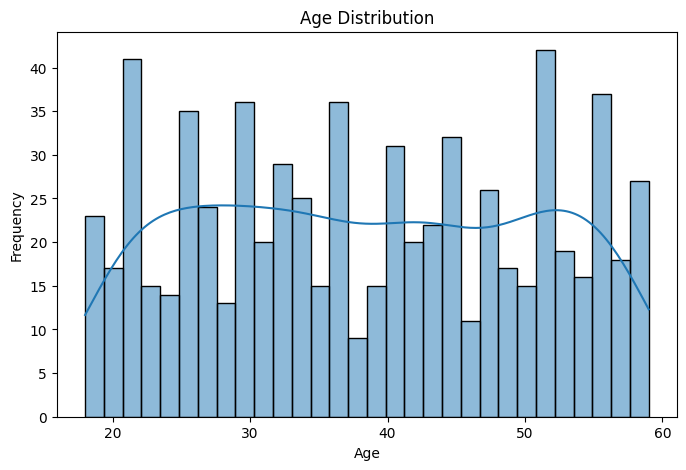

In [ ]:
plt.figure(figsize=(8, 5))
sns.histplot(df['Age'], bins=30, kde=True)  # Adjust bins as needed
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


**The difference between LabelEncoder and get_dummies lies in how they handle categorical data for machine learning models:**

1. LabelEncoder (from sklearn.preprocessing)
Function: LabelEncoder assigns each category in a column a unique integer value, transforming text labels (like "Male", "Female") into numbers (e.g., 0, 1).
Use Case: Best for ordinal data or target labels where there’s a meaningful order, or when you only have one categorical column.
Output: A single column with integer codes for each category.
2. get_dummies (from pandas)
Function: get_dummies performs one-hot encoding, creating a new binary column for each category in the original column (e.g., "Male" becomes [1, 0], "Female" becomes [0, 1]).
Use Case: Best for nominal data where there’s no inherent order, especially for models that require independent binary columns for each category.
Output: Multiple columns, one for each unique category.

At the finally **LabelEncoder** is better in column have two category like Gender (female 1 , male 0)


In [ ]:
encoder = LabelEncoder()
data['Gender'] = encoder.fit_transform(df['Gender'])  # "Male" -> 1, "Female" -> 0

In [ ]:
data = pd.get_dummies(data, columns=['Device Model', 'Operating System'])


In [ ]:
data.head(1)

,User ID,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Gender,User Behavior Class,Device Model_Google Pixel 5,Device Model_OnePlus 9,Device Model_Samsung Galaxy S21,Device Model_Xiaomi Mi 11,Device Model_iPhone 12,Operating System_Android,Operating System_iOS
0,1,393,6.4,1872,67,1122,40,1,4,True,False,False,False,False,True,False


**A heatmap is a great way to visualize the correlation between variables in your dataset, especially for continuous numeric data. In a heatmap, the strength of relationships between variables is represented by color intensity.**

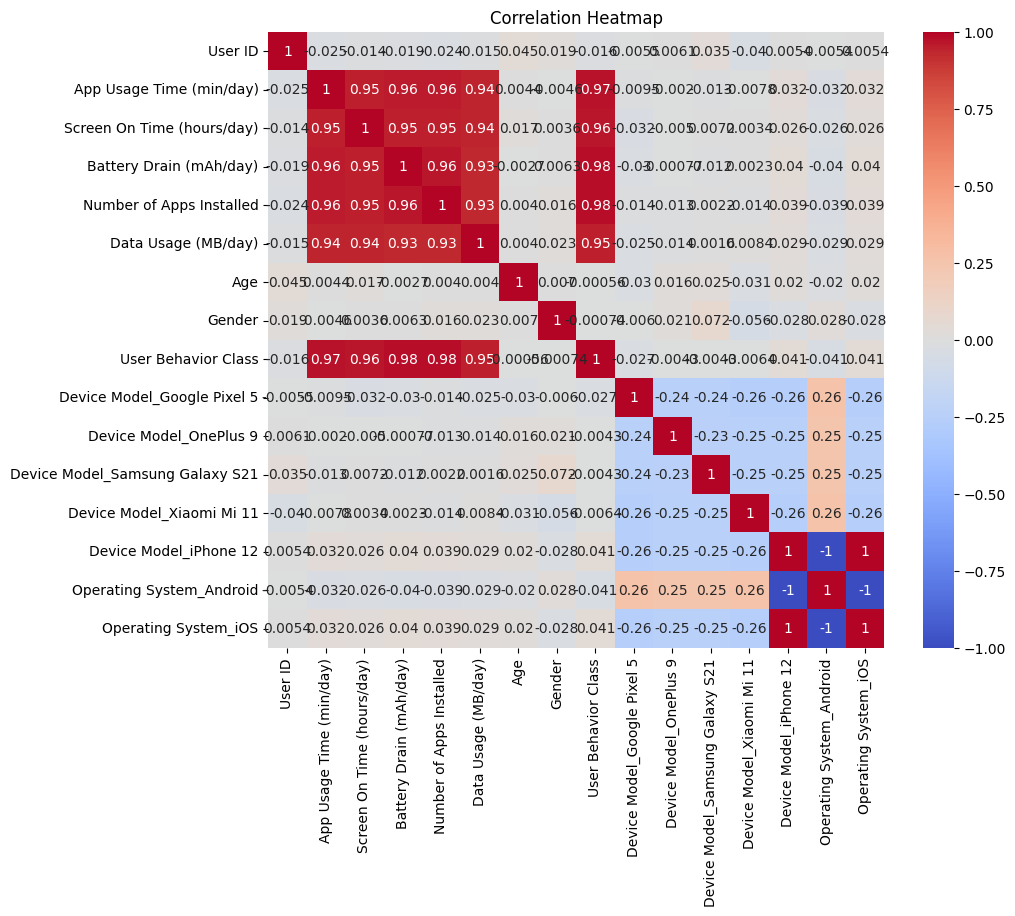

In [ ]:
correlation_matrix = data.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, square=True)
plt.title('Correlation Heatmap')
plt.show()


In [ ]:
from IPython.display import display, HTML
html_content = """
<h1 style="color: red ">Finally END Data Visulization</h1>"""
display(HTML(html_content))

In [ ]:
from IPython.display import display, HTML
html_content = """
<h1 style="color: red ">Let's Go, My Friend, To The Machine Learning Part</h1>"""
display(HTML(html_content))

**Explanation of Code
Data Preparation:
X contains all features except User ID and User Behavior Class (our target).
y contains User Behavior Class, which we’re predicting.
Data Split:
train_test_split divides the data into training and testing sets (80% train, 20% test).
Model Training:
RandomForestClassifier is used as an example classifier for this task, but other classifiers like LogisticRegression, SVM, or XGBoost can also be tried.
Evaluation:
Accuracy and a classification report (precision, recall, F1-score) provide insights into model performance.
This model can be improved with hyperparameter tuning and feature engineering for better results, but this is a solid starting point**



*   X represents the features used to train the model. Here, data.drop(['User ID', 'User Behavior Class'], axis=1) creates a new DataFrame containing all columns except User ID and User Behavior Class. This excludes:

*         User ID, which is likely an identifier and
          does not contain meaningful information for predictions.
*         User Behavior Class, the target variable we
          want to predict.

*   y is the target variable that the model will learn to predict. y = data['User Behavior Class'] assigns only the values in the User Behavior Class column, which we want to use as the output label for our model.



In [ ]:

X = data.drop(['User ID', 'User Behavior Class'], axis=1)
y = data['User Behavior Class']  # Target variable

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00        27
           2       1.00      1.00      1.00        29
           3       1.00      1.00      1.00        34
           4       1.00      1.00      1.00        27
           5       1.00      1.00      1.00        23

    accuracy                           1.00       140
   macro avg       1.00      1.00      1.00       140
weighted avg       1.00      1.00      1.00       140



In [ ]:
!pip install gradio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.6/50.6 kB 1.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.7/56.7 MB 13.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 319.8/319.8 kB 16.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.7/94.7 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.4/76.4 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.0/78.0 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 447.5/447.5 kB 20.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 144.5/144.5 kB 9.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.0/11.0 MB 90.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.3/73.3 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.7/63.7 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.2/13

In [ ]:
pip install --upgrade gradio


In [ ]:
import pandas as pd
import pickle
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Sample data (replace with your actual data)
data = pd.DataFrame({
    'App Usage Time (min/day)': [393, 268],
    'Screen On Time (hours/day)': [6.4, 4.7],
    'Battery Drain (mAh/day)': [1872, 1331],
    'Number of Apps Installed': [67, 42],
    'Data Usage (MB/day)': [1122, 944],
    'Age': [40, 47],
    'Gender': [1, 0]  # Example encoding: 1 for Male, 0 for Female
})

# Prepare the data
X = data.drop(['User Behavior Class'], axis=1, errors='ignore')  # Features
y = [4, 3]  # Example target values

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Save the model
with open('best_model.pkl', 'wb') as model_file:
    pickle.dump(model, model_file)

# Train and save the scaler
scaler = StandardScaler()
scaler.fit(X_train)
with open('scaler.pkl', 'wb') as scaler_file:
    pickle.dump(scaler, scaler_file)


In [ ]:
import gradio as gr
import pickle
import pandas as pd

# Load the model and scaler
with open('best_model.pkl', 'rb') as model_file:
    model = pickle.load(model_file)

with open('scaler.pkl', 'rb') as scaler_file:
    scaler = pickle.load(scaler_file)

# Define the prediction function
def predict_user_behavior(app_usage, screen_time, battery_drain, num_apps, data_usage, age, gender):
    # Prepare the input data for prediction
    input_data = pd.DataFrame({
        'App Usage Time (min/day)': [app_usage],
        'Screen On Time (hours/day)': [screen_time],
        'Battery Drain (mAh/day)': [battery_drain],
        'Number of Apps Installed': [num_apps],
        'Data Usage (MB/day)': [data_usage],
        'Age': [age],
        'Gender': [1 if gender == 'Male' else 0],  # Example encoding
    })

    # Scale the input data
    scaled_input = scaler.transform(input_data)

    # Make prediction
    prediction = model.predict(scaled_input)[0]
    return f"Predicted User Behavior Class: {prediction}"

# Create Gradio interface
interface = gr.Interface(
    fn=predict_user_behavior,
    inputs=[
        gr.Slider(0, 1000, label="App Usage Time (min/day)"),
        gr.Slider(0, 24, label="Screen On Time (hours/day)"),
        gr.Slider(0, 5000, label="Battery Drain (mAh/day)"),
        gr.Slider(0, 200, label="Number of Apps Installed"),
        gr.Slider(0, 5000, label="Data Usage (MB/day)"),
        gr.Slider(0, 100, label="Age"),
        gr.Radio(["Male", "Female"], label="Gender"),
    ],
    outputs="text",
    title="User Behavior Class Prediction",
    description="Predict user behavior class based on device usage metrics."
)

# Launch the Gradio app
interface.launch()


Running Gradio in a Colab notebook requires sharing enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://9e4a1c7fc902b0b6c7.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
